In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import LogNorm
from scipy.optimize import minimize
from sklearn.externals import joblib

from tqdm import tqdm
import multiprocessing as mp
from joblib import Parallel, delayed

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rc('text', usetex=True)
plt.rc('axes', labelsize=25)
plt.rc('figure', figsize=(10, 7.5))
plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=25) 

In [3]:
R_E = 6371000
depth_icecube = 1950
cut = 77.0 / 180 * np.pi


def calc_range(depth, zenith):
    b = R_E - depth_icecube + depth
    return -b * np.cos(zenith) + np.sqrt((R_E ** 2 - b ** 2) * np.sin(zenith) ** 2 + R_E ** 2 * np.cos(zenith) ** 2) + np.finfo(float).max * (R_E ** 2 - b ** 2 < 0.0)

r_gen = 800
h_gen = 1600
A_gen = 2 * np.pi * r_gen * h_gen + 2 * np.pi * r_gen**2

In [4]:
A_gen

12063715.789784806

In [5]:
eMin = 400
eMax = 30000

data_dir = '/home/sninfa/jupyter/data/400-30k_10Bins'

area = joblib.load('%s/effArea_mgs_corsica_total.pickle' % data_dir)
input_df = joblib.load('/home/sninfa/jupyter/data/df_corsica_est.pickle')
# input_df = joblib.load('%s/df_corsica_est.pickle' % data_dir)

# input_df = input_df[(input_df.single_stopping > 0.79) & (input_df.quality < -0.6) & (input_df.zenith < cut) & (input_df.energy_stop > 0.0)]

input_df['range'] = calc_range(input_df.stop_z, input_df.zenith)
input_df['range_log'] = np.log10(input_df.range)
input_df['energy_log'] = np.log10(input_df.energy_stop)

print('before %i' % len(input_df.index))
input_df = input_df[(input_df.single_stopping > 0.79) & (input_df.quality < -0.6) & (input_df.energy_stop > 0.0) & (input_df.range < 20000)]
print('after %i' % len(input_df.index))

before 2127602
after 18218


In [6]:
input_df.energy_stop.min()

383.40264692260246

In [7]:
input_df[input_df.energy_stop < 500]

,index,energy_stop,quality,single_stopping,stop_z,weight,weight_G4,weight_H,zenith,zenith_cos,range,range_log,energy_log
543,543,475.993444,-0.649539,0.994143,76.695422,2.831098e-06,2.824300e-06,0.000003,0.319162,0.949499,1972.908866,3.295107,2.677601
665,665,489.973175,-0.740203,0.979339,38.648667,1.519117e-06,1.578880e-06,0.000002,0.181418,0.983589,1943.232552,3.288525,2.690172
3424,3424,438.605058,-1.034604,0.990071,20.022688,2.255891e-06,2.242413e-06,0.000003,0.070442,0.997520,1934.774136,3.286630,2.642074
5348,5348,483.026052,-0.684470,0.809649,227.969340,2.903341e-06,2.894962e-06,0.000003,0.192767,0.981478,1754.519332,3.244158,2.683971
12223,12223,486.792007,-0.898600,0.962759,48.986406,1.520668e-06,1.579929e-06,0.000002,0.094321,0.995555,1909.498669,3.280919,2.687343
13966,13966,488.363212,-0.676181,0.794239,-33.144786,2.920420e-06,2.911606e-06,0.000002,0.274447,0.962575,2060.223841,3.313914,2.688743
14026,14026,425.966952,-0.781676,0.860528,285.545974,1.510677e-06,1.573211e-06,0.000001,0.286760,0.959165,1735.295189,3.239373,2.629376
14640,14640,442.842304,-0.954510,0.862298,247.398837,1.525915e-06,1.583569e-06,0.000002,0.203346,0.979396,1738.409122,3.240152,2.646249
18175,18175,485.744172,-0.732347,0.864340,229.691558,1.524953e-06,1.582890e-06,0.000002,0.157666,0.987596,1741.908477,3.241025,2.686408
18489,18489,456.427413,-0.667494,0.807320,224.060822,2.924718e-06,2.915789e-06,0.000002,0.245300,0.970065,1779.185123,3.250221,2.659372


In [8]:
input_df.energy_stop.max()

583466.0510095524

In [9]:
calc_range(-500, 79.2 / 180 * np.pi)

13006.57704916154

In [10]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18218 entries, 31 to 2127566
Data columns (total 13 columns):
index              18218 non-null object
energy_stop        18218 non-null float64
quality            18218 non-null float64
single_stopping    18218 non-null float64
stop_z             18218 non-null float64
weight             18218 non-null float64
weight_G4          18218 non-null float64
weight_H           18218 non-null float64
zenith             18218 non-null float64
zenith_cos         18218 non-null float64
range              18218 non-null float64
range_log          18218 non-null float64
energy_log         18218 non-null float64
dtypes: float64(12), object(1)
memory usage: 1.9+ MB


In [11]:
input_df.head()

,index,energy_stop,quality,single_stopping,stop_z,weight,weight_G4,weight_H,zenith,zenith_cos,range,range_log,energy_log
31,31,901.579416,-0.915937,0.918982,-37.809643,0.000003,0.000003,0.000003,0.302525,0.954587,2082.344151,3.318553,2.955004
37,37,4198.363125,-0.885295,0.860499,47.196788,0.000002,0.000002,0.000002,1.450813,0.119696,15736.920622,4.196920,3.623080
56,56,649.290432,-0.942562,0.993283,82.244806,0.000002,0.000002,0.000002,0.342461,0.941931,1982.863298,3.297293,2.812439
110,110,2012.401581,-0.610688,0.843741,-49.841582,0.000003,0.000003,0.000002,1.046351,0.500733,3991.960312,3.601186,3.303715
134,134,732.367213,-0.667617,0.994773,99.916354,0.000002,0.000002,0.000002,0.808617,0.690499,2678.915551,3.427959,2.864729


In [12]:
input_df[['weight', 'weight_G4', 'weight_H']].as_matrix()

array([[2.85949097e-06, 2.85211236e-06, 2.58779403e-06],
       [1.51359081e-06, 1.57519584e-06, 1.53493252e-06],
       [1.51992519e-06, 1.57942518e-06, 1.61780631e-06],
       ...,
       [1.52231428e-06, 1.58105406e-06, 1.64861846e-06],
       [1.51175326e-06, 1.57395293e-06, 1.51205527e-06],
       [1.49789523e-06, 1.56321812e-06, 1.39403480e-06]])

In [13]:
input_df['weight_norm'] = input_df.weight.values / input_df.weight.sum()
input_df['weight_G4_norm'] = input_df.weight_G4.values / input_df.weight_G4.sum()
input_df['weight_H_norm'] = input_df.weight_H.values / input_df.weight_H.sum()

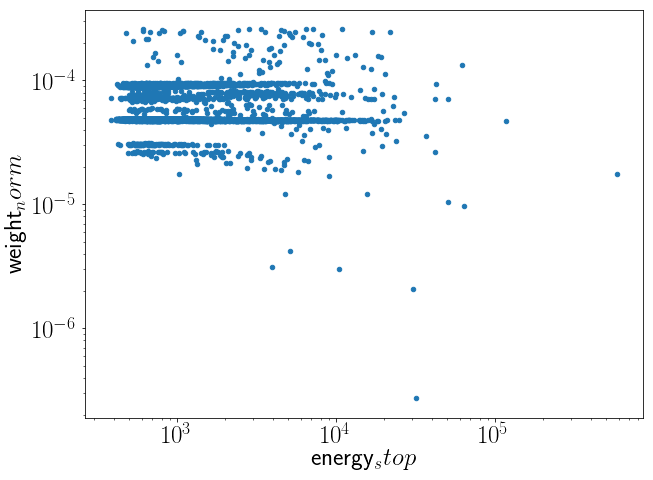

In [14]:
input_df.plot('energy_stop', 'weight_norm', loglog=True, kind='scatter')

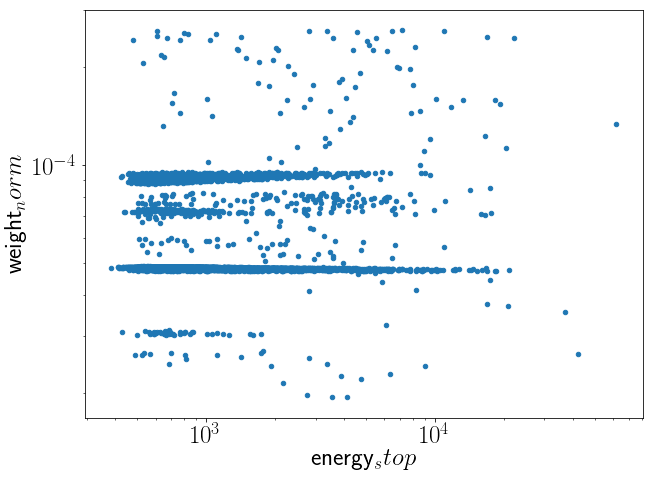

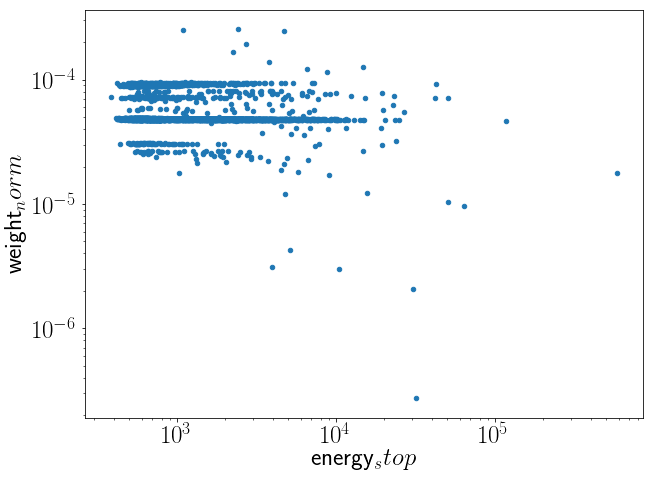

In [15]:
sel = np.random.choice(input_df.index, len(input_df.index)/2, p=input_df.loc[input_df.index, "weight_norm"], replace=False)
data = input_df[input_df.index.isin(sel)]
mc = input_df[~input_df.index.isin(sel)]
data.plot('energy_stop', 'weight_norm', loglog=True, kind='scatter')
mc.plot('energy_stop', 'weight_norm', loglog=True, kind='scatter')

In [16]:
print area

                        effective_area_total
e_bin                                       
(400.0, 615.979]                   50.256879
(615.979, 948.576]                 42.830950
(948.576, 1460.758]                38.692079
(1460.758, 2249.492]               46.101242
(2249.492, 3464.102]               94.191642
(3464.102, 5334.537]              203.337422
(5334.537, 8214.911]              301.038782
(8214.911, 12650.538]             345.085672
(12650.538, 19481.174]            389.695362
(19481.174, 30000.0]              404.023877


In [17]:
cmap = plt.cm.magma
cmap.set_under('w')

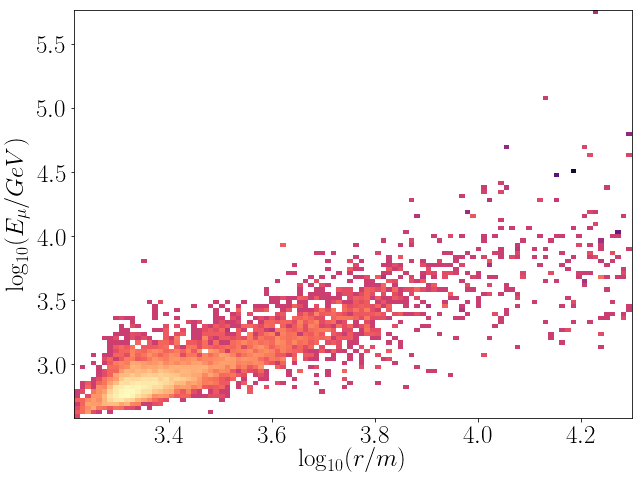

In [18]:
plt.hist2d(mc.range_log, mc.energy_log, bins=(100, 100), cmap=cmap, norm=colors.LogNorm(vmin=10e-8), weights=mc.weight_norm)
plt.xlabel('$\log_{10} (r / m)$')
plt.ylabel('$\log_{10} (E_{\mu} / GeV)$')
plt.show()

In [19]:
nbins_E = 10
nbins_r = 10

binning_E = np.logspace(np.log10(eMin), np.log10(eMax), nbins_E + 1)
binning_r = np.logspace(np.log10(2000), np.log10(13000), nbins_r + 1)

mc['energy_idx'] = np.digitize(mc.energy_stop, binning_E)
mc['range_idx'] = np.digitize(mc.range, binning_r)

data['energy_idx'] = np.digitize(data.energy_stop, binning_E)
data['range_idx'] = np.digitize(data.range, binning_r)

In [20]:
bin_width = [binning_E[i+1] - binning_E[i] for i in range(nbins_E)]
print bin_width

[215.97929962352657, 332.5969442881981, 512.1820819989243, 788.7339003735401, 1214.6093888535665, 1870.435601655448, 2880.374029746581, 4435.626943742709, 6830.635945494718, 10518.8258642228]


In [21]:
binning_idx_r = np.arange(nbins_r + 3) - 0.5
binning_idx_E = np.arange(nbins_E + 3) - 0.5

acceptance = area.values
acceptance = np.insert(acceptance, 0 , 1.0)
acceptance = np.append(acceptance, 1.0)

In [22]:
g, _ = np.histogram(mc.range_idx, binning_idx_r, weights=mc.weight_norm)
f, _ = np.histogram(mc.energy_idx, binning_idx_E, weights=mc.weight_norm)
f_data, _ = np.histogram(data.energy_idx, binning_idx_E)
g_data, _ = np.histogram(data.range_idx, binning_idx_r)

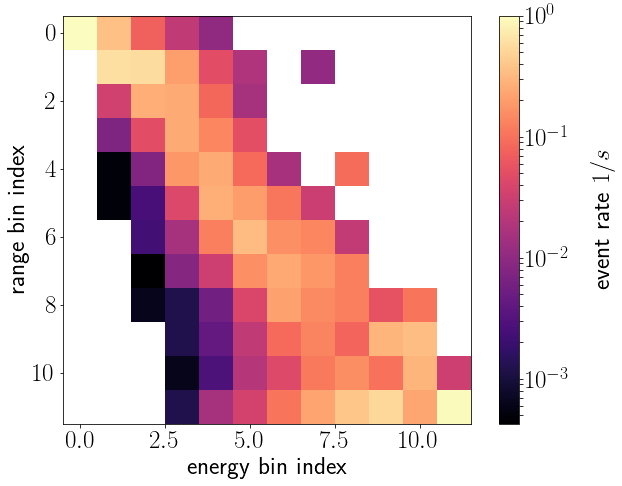

In [23]:
H, _, _ = np.histogram2d(mc['range_idx'], mc['energy_idx'], (binning_idx_r, binning_idx_E), weights=mc.weight_norm)

A = H / np.sum(H, axis=0)

A = np.nan_to_num(A)

plt.figure()
# plt.imshow(np.flipud(A.T), norm=LogNorm())
plt.imshow(A, norm=LogNorm(), cmap=cmap)
cbar = plt.colorbar()
cbar.ax.set_ylabel(r'event rate $1/s$', rotation=90, labelpad=20)
plt.ylabel(r'range bin index')
plt.xlabel(r'energy bin index')
plt.show()

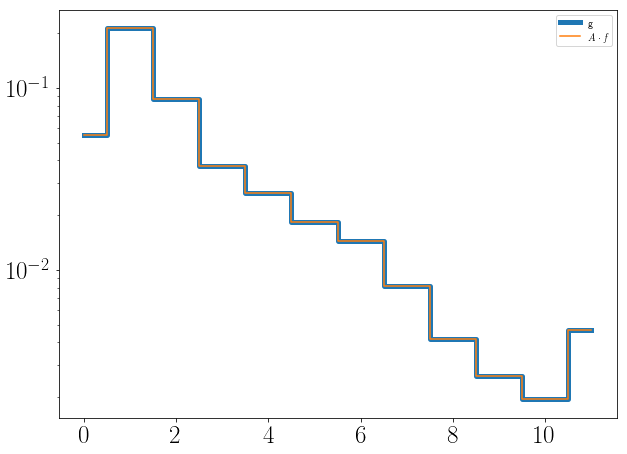

In [24]:
plt.figure()
plt.plot(g, lw=5, drawstyle='steps-mid', label='g')
plt.plot(A.dot(f), drawstyle='steps-mid', label=r'$A \cdot f$')
plt.legend()
plt.yscale('log')
plt.show()

In [25]:
def llh_poisson(A, f_est, g):
    return np.sum(A.dot(f_est) - g * np.log(np.abs(A.dot(f_est)) + 1e-8))
    # return np.sum(A.dot(f_est) - g * np.log(np.abs(A.dot(f_est / acceptance)) + 1e-8))

In [26]:
def only_positive(f_est):
    return np.finfo('float').max * (f_est < 0.0).any()

In [27]:
def C_matrix(n):
    I = np.eye(n)
    C = 2.0 * I - np.roll(I, 1) - np.roll(I, -1)
    return C

In [28]:
def tikhonov_reg(f_est, tau):
    C = C_matrix(len(f_est) - 2)
    return tau * np.sum(C.dot(np.log(np.abs(f_est[1:-1] / acceptance[1:-1]) + 10e+8)) ** 2)

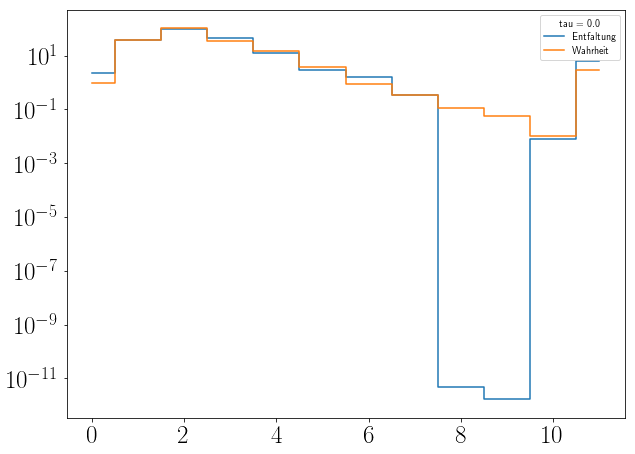

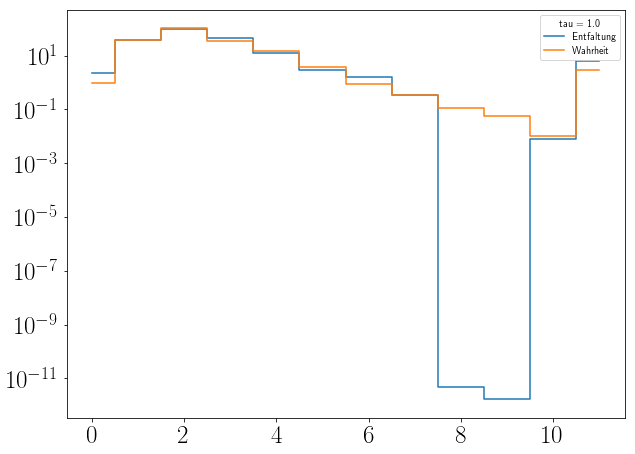

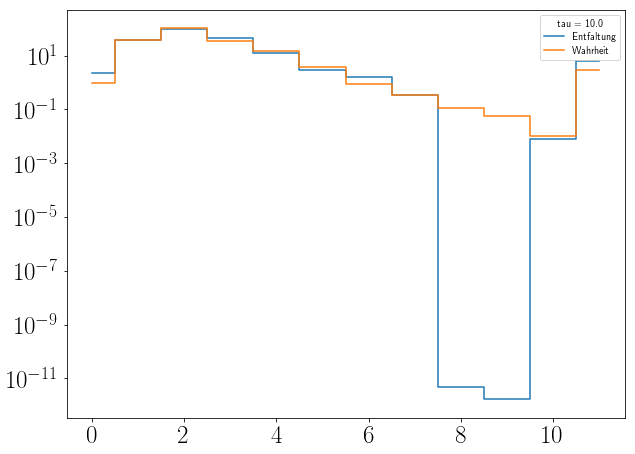

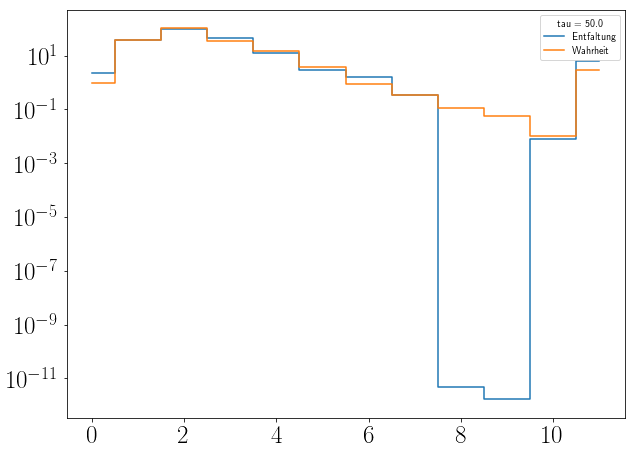

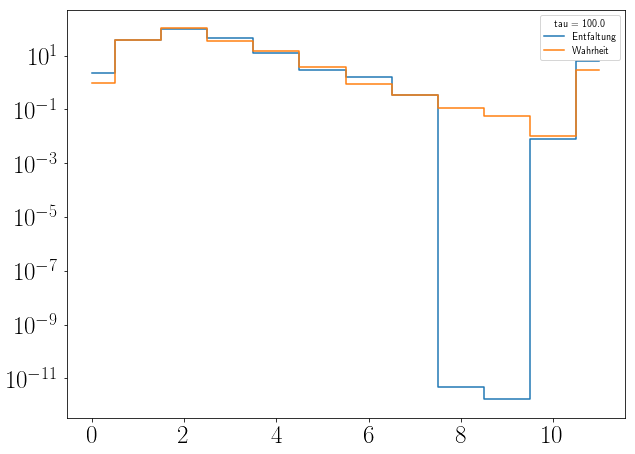

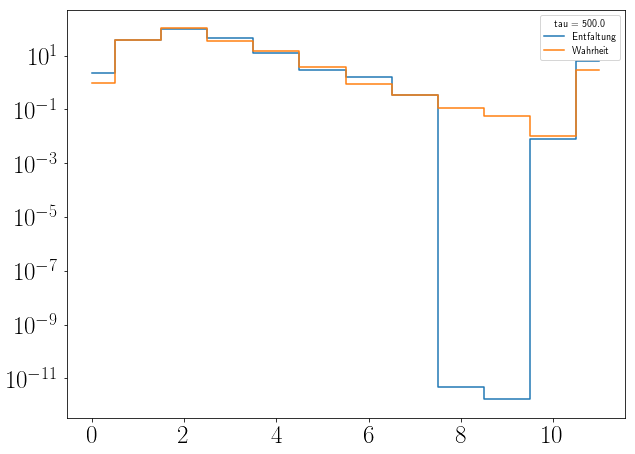

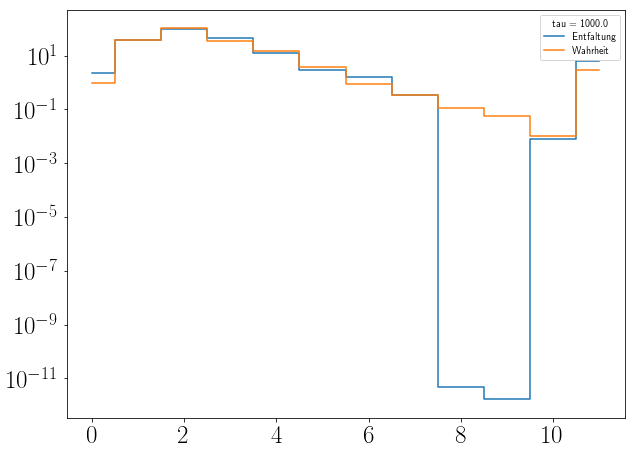

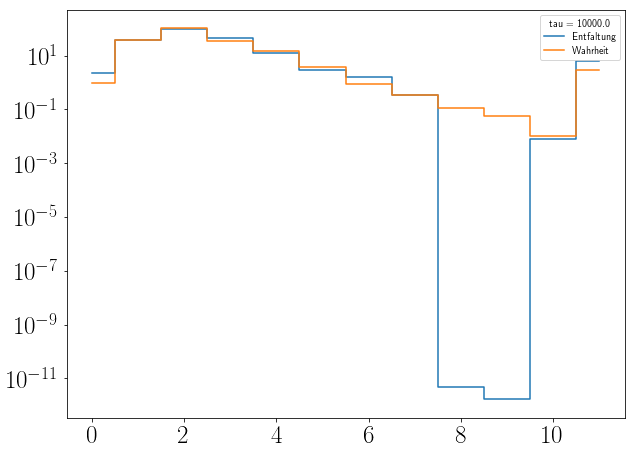

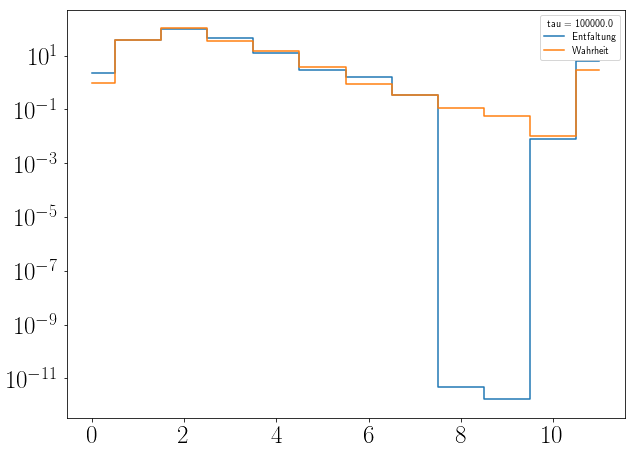

In [29]:
for tau in [0.0, 1.0, 10.0, 50.0, 100.0, 500.0, 1000.0, 10000.0, 100000.0]:
    function = lambda f_est: llh_poisson(A, f_est, g_data)\
                           + only_positive(f_est)\
                           + tikhonov_reg(f_est, tau)
    result = minimize(function, x0=f_data, method='Nelder-Mead', options={'maxiter': 10000})

    plt.plot(result.x / acceptance, drawstyle='steps-mid', label='Entfaltung')
    plt.plot(f_data / acceptance, drawstyle='steps-mid', label='Wahrheit')
    plt.yscale('log')
    plt.legend(title='tau = {}'.format(tau))
    plt.show()

In [30]:
def mcmc(x0, fun, step_size=1.5, n_steps=10000, print_acceptance=False, print_results=False):
    x = [x0]
    f = [fun(x0)]
    acc = 0
    for _ in range(n_steps):
        x_new = x[-1] + step_size * np.random.randn(len(x0))
        f_new = fun(x_new)
        prop_eval = -np.log(np.random.rand()) > f_new - f[-1]
        if prop_eval:
            x.append(x_new)
            f.append(f_new)
            acc += 1
        else:
            if print_results:
                print 'x_new: {}'.format(x_new)
                print 'f_new: {}'.format(f_new)
            x.append(x[-1])
            f.append(f[-1])
    if print_acceptance:
        print('{}% of proposed steps accepted.'.format(100 * acc / n_steps))
    return np.array(x), np.array(f)

In [31]:
function = lambda f_est: llh_poisson(A, f_est, g_data)\
                           + only_positive(f_est)\
                           + tikhonov_reg(f_est, 10)

result = minimize(function, x0=f_data, method='Nelder-Mead', options={'maxiter': 10000})

x_sample, f_sample = mcmc(50.0 * np.ones(len(f_data)), function, step_size=1.2, n_steps=10000)
x_sample, f_sample = mcmc(result.x, function, step_size=1.2, n_steps=100000, print_acceptance=True, print_results=False)

75% of proposed steps accepted.


In [32]:
area.values[0]

array([50.25687887])

In [33]:
area.values.transpose()

array([[ 50.25687887,  42.83095037,  38.69207913,  46.10124196,
         94.19164215, 203.33742179, 301.03878243, 345.08567223,
        389.69536222, 404.02387711]])

In [34]:
np.array(bin_width)

array([  215.97929962,   332.59694429,   512.182082  ,   788.73390037,
        1214.60938885,  1870.43560166,  2880.37402975,  4435.62694374,
        6830.63594549, 10518.82586422])

In [35]:
np.multiply(area.values.transpose(), np.array(bin_width))[0]

array([  10854.44549957,   14245.44321373,   19817.38964422,
         36361.61238018,  114406.05290359,  380329.5528704 ,
        867104.29087197, 1530671.30562238, 2661867.1490057 ,
       4249856.808261  ])

In [36]:
bin_width = [binning_E[i+1] - binning_E[i] for i in range(nbins_E)]

acceptance = np.multiply(area.values.transpose(), np.array(bin_width))[0] * (2 * np.pi * (1 - np.cos(79.2 / 180 * np.pi)))
acceptance = np.insert(acceptance, 0 , acceptance[0])
acceptance = np.append(acceptance, acceptance[-1])

In [37]:
acceptance

array([   55420.99454411,    55420.99454411,    72734.86523631,
         101184.29756674,   185656.34895085,   584138.2900704 ,
        1941899.48030259,  4427290.38304897,  7815353.26526438,
       13591051.21933602, 21699062.47105324, 21699062.47105324])

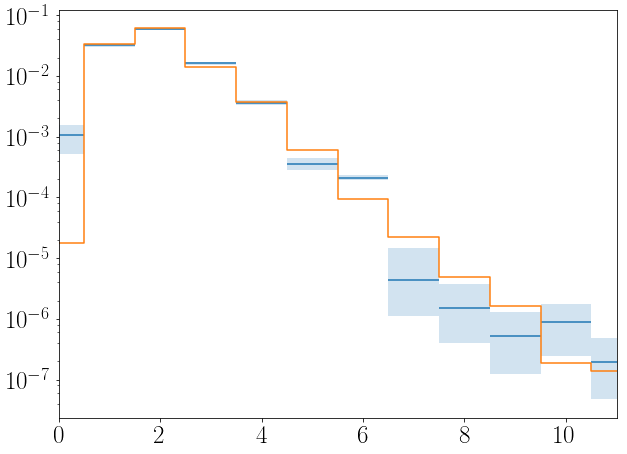

In [38]:
plt.figure()
plt.fill_between(np.arange(nbins_E + 2), np.percentile(x_sample, 15, axis=0) / acceptance,
                 np.percentile(x_sample, 85, axis=0) / acceptance, step='mid', alpha=0.2)
plt.errorbar(np.arange(nbins_E + 2), np.median(x_sample, axis=0) / acceptance, 0, np.ones(nbins_E + 2) * 0.5, linestyle='')
plt.plot(f_data / acceptance, drawstyle='steps-mid')
plt.yscale('log')
plt.xlim([0, nbins_E + 1])
# plt.ylim([1.0, 1e4])
plt.show()

In [39]:
area.values[0]

array([50.25687887])

In [40]:
np.array(bin_width)

array([  215.97929962,   332.59694429,   512.182082  ,   788.73390037,
        1214.60938885,  1870.43560166,  2880.37402975,  4435.62694374,
        6830.63594549, 10518.82586422])

In [41]:
acceptance = area.values[0] * np.array(bin_width) * (2 * np.pi * (1 - np.cos(79.2 / 180 * np.pi)))


plt.figure()
plt.fill_between(np.arange(nbins_E + 2), np.percentile(x_sample, 15, axis=0) / acceptance,
                 np.percentile(x_sample, 85, axis=0) / acceptance, step='mid', alpha=0.2)
plt.errorbar(np.arange(nbins_E + 2), np.median(x_sample, axis=0) / acceptance, 0, np.ones(nbins_E + 2) * 0.5, linestyle='')
plt.plot(f_data / acceptance, drawstyle='steps-mid')
plt.yscale('log')
plt.xlim([0, nbins_E + 1])
# plt.ylim([1.0, 1e4])
plt.show()

ValueError: operands could not be broadcast together with shapes (12,) (10,) 

In [ ]:
plt.figure()
plt.hist2d(np.tile(np.arange(nbins_E + 2), (len(x_sample), 1)).flatten(),
           np.log10(x_sample.flatten()),
           (binning_idx_E, np.linspace(0.0, 3.0, 100)))
plt.show()

In [ ]:
bin_idx = 6
plt.figure()
plt.hist(x_sample[:, bin_idx], 100)
plt.show()